In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.8/107.7 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="xvcLPKYYc1H8NcC0NQsY")
project = rf.workspace("imagedetect-kt97h").project("image_text-hrt8n")
version = project.version(3)
dataset = version.download("yolov5")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.1

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to image_text-3 in yolov5pytorch:: 100%|██████████| 1376/1376 [00:00<00:00, 5054.23it/s]


In [8]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=15 imgsz=256 batch=12 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.6 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/image_text-3/data.yaml, epochs=15, patience=50, batch=12, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=

In [10]:
!ls {HOME}/runs/detect/train4/

args.yaml					    R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		val_batch0_pred.jpg
confusion_matrix.png				    results.png		val_batch1_labels.jpg
events.out.tfevents.1714683807.e4db5ceb867c.2034.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch235.jpg	val_batch2_pred.jpg
labels.jpg					    train_batch236.jpg	weights
P_curve.png					    train_batch237.jpg
PR_curve.png					    train_batch2.jpg


/content


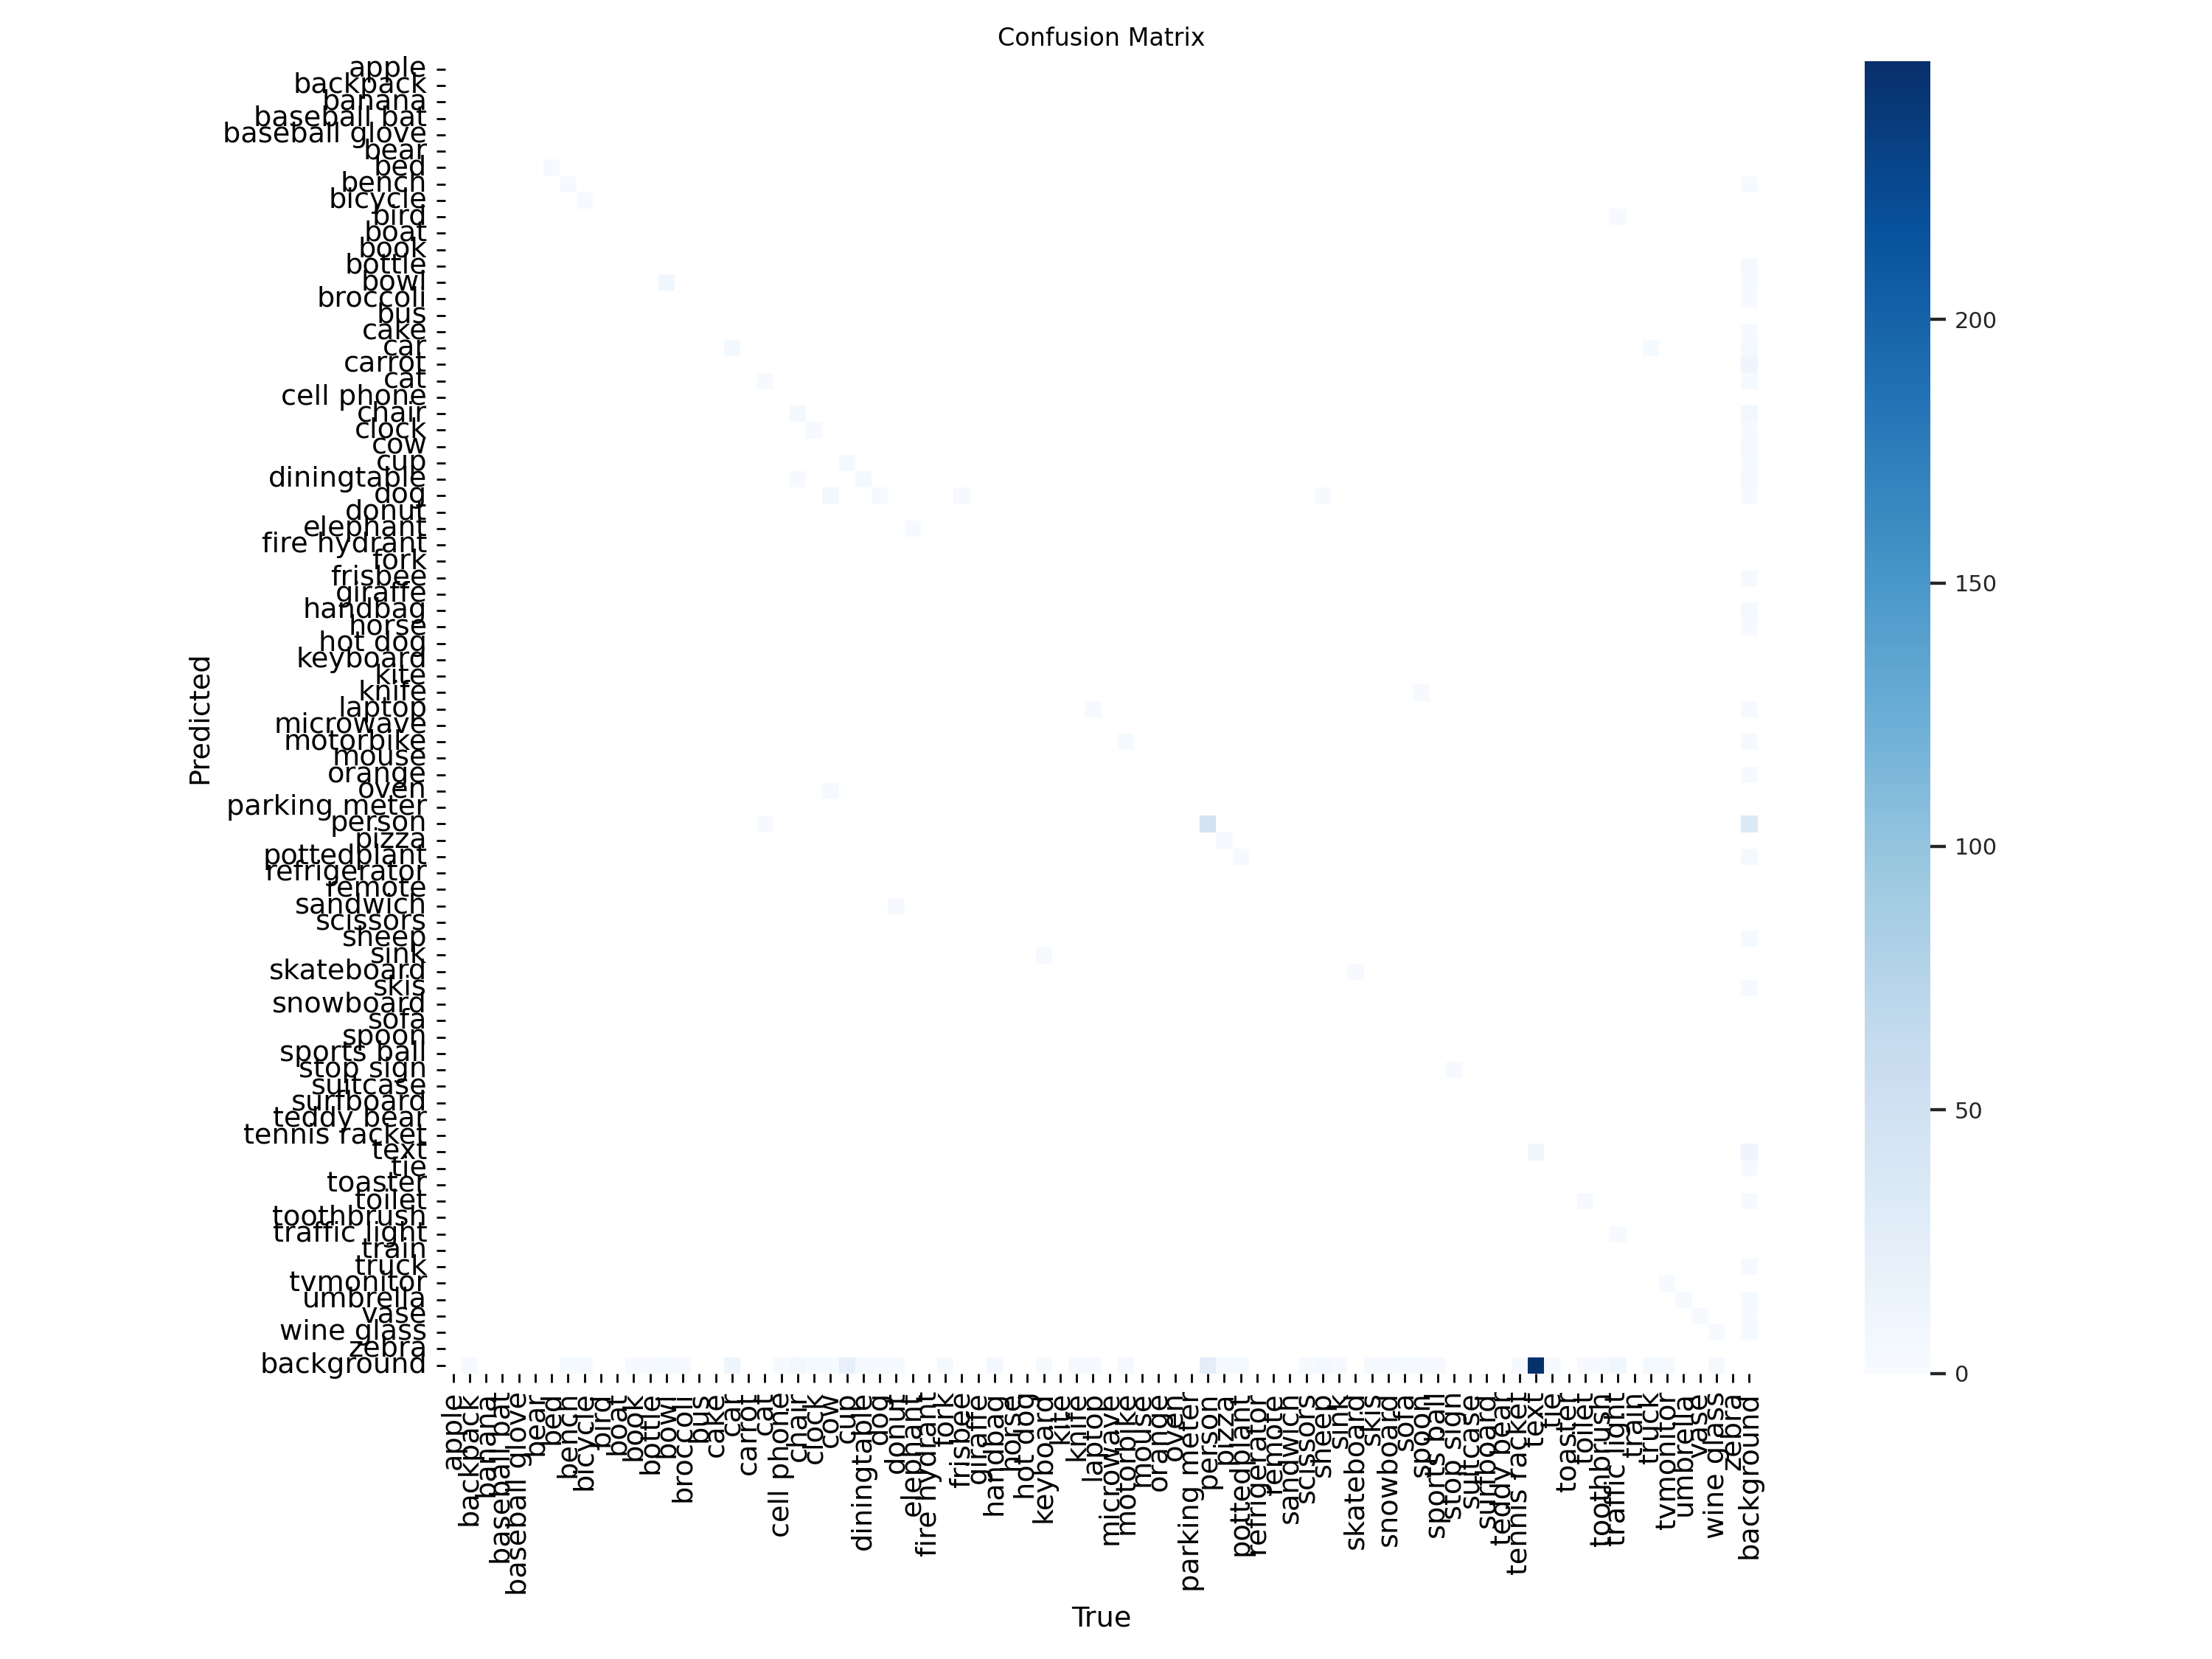

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=800)

/content


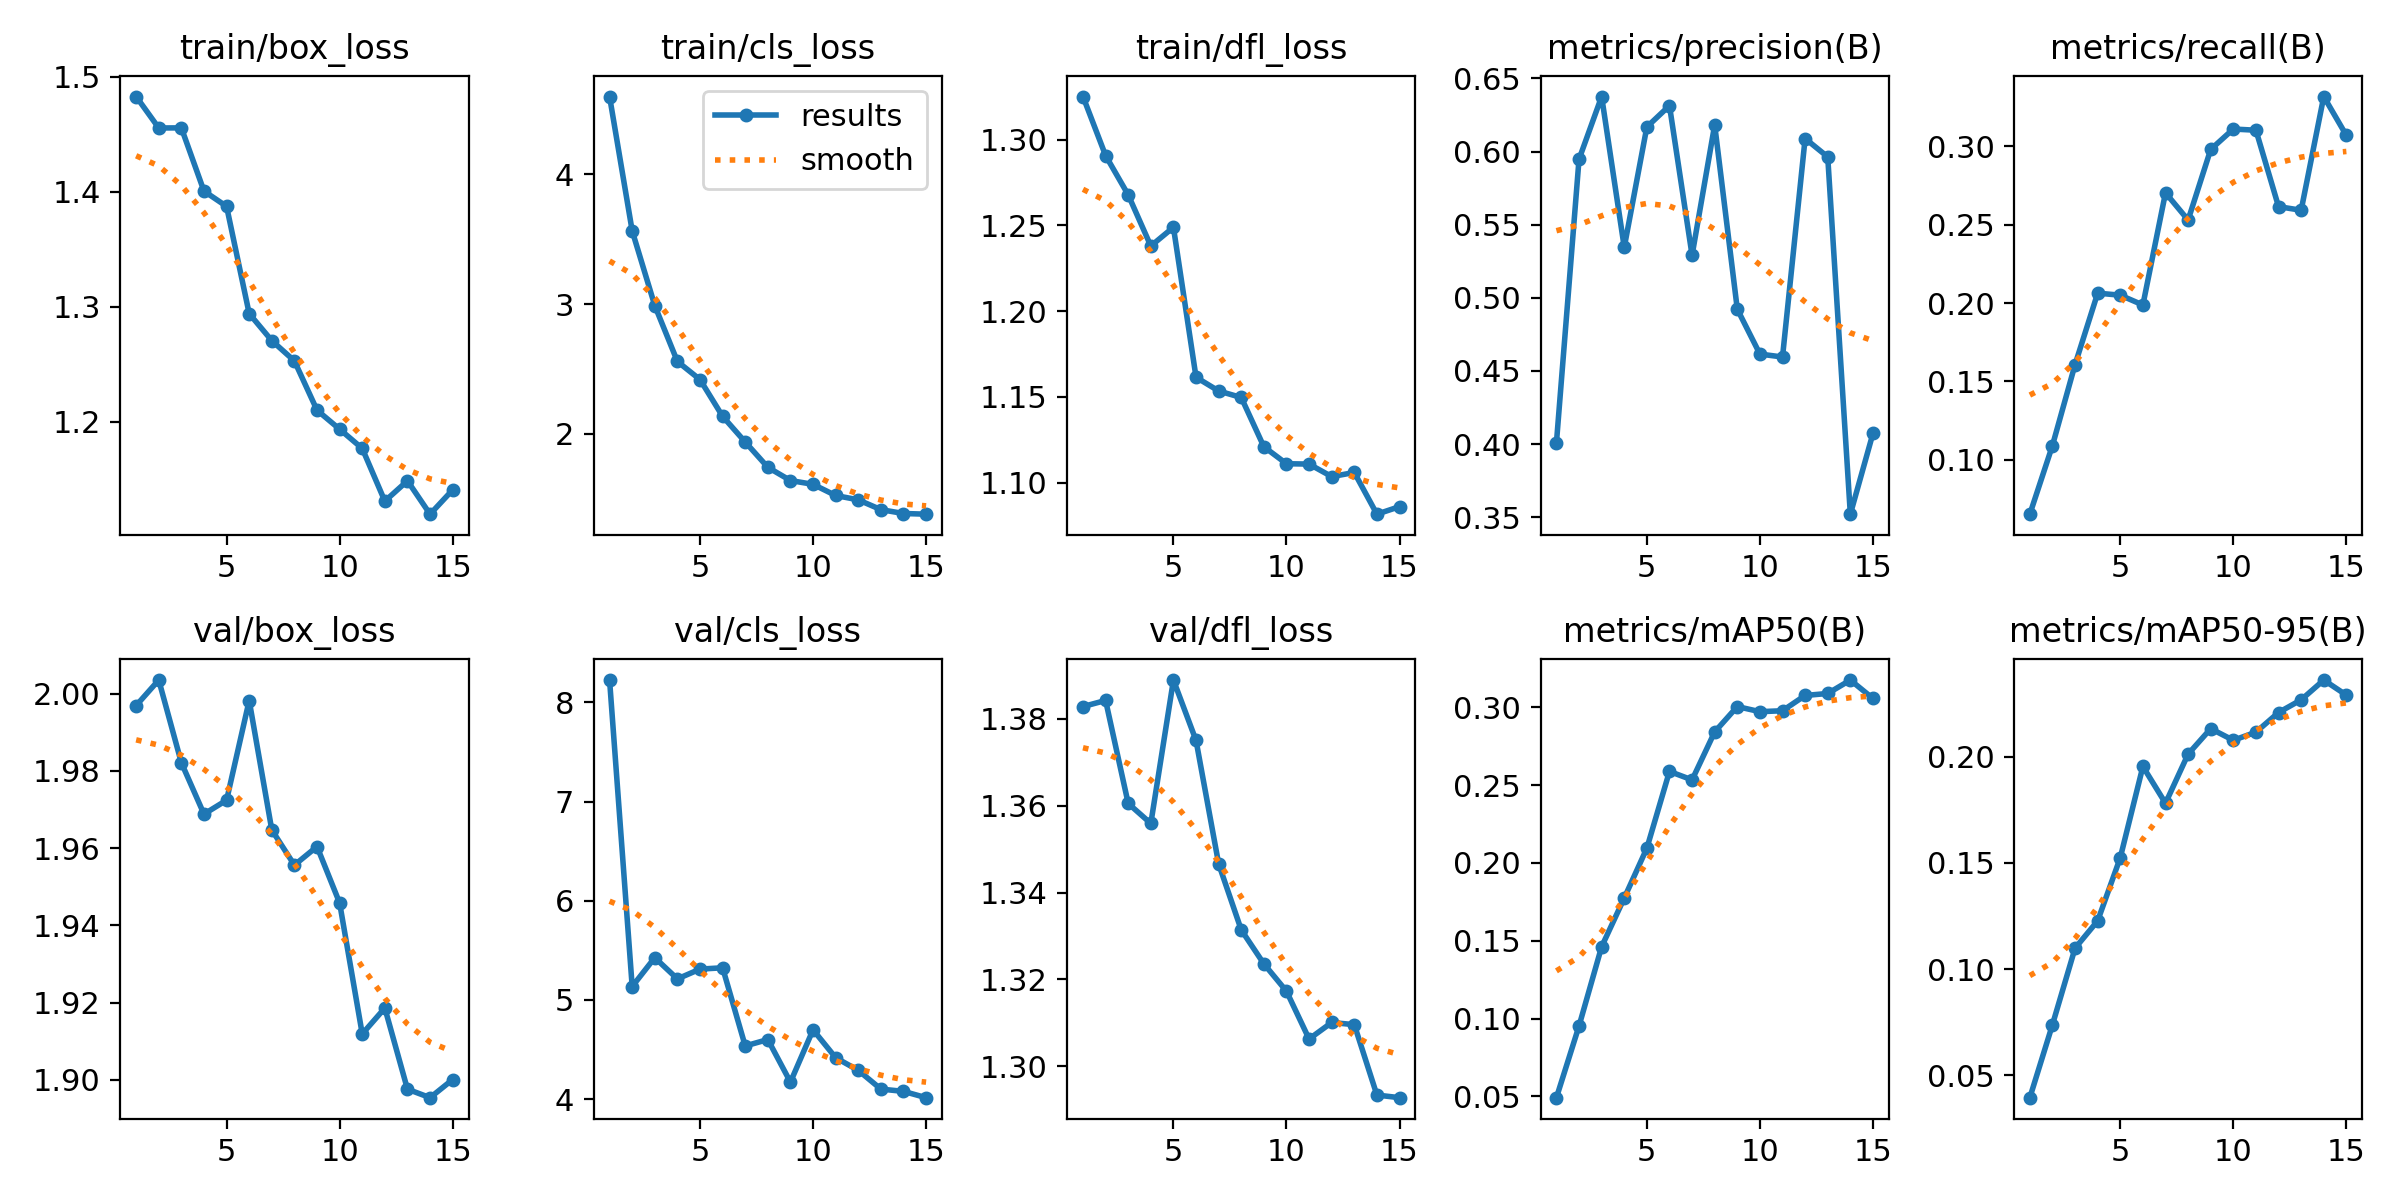

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

/content


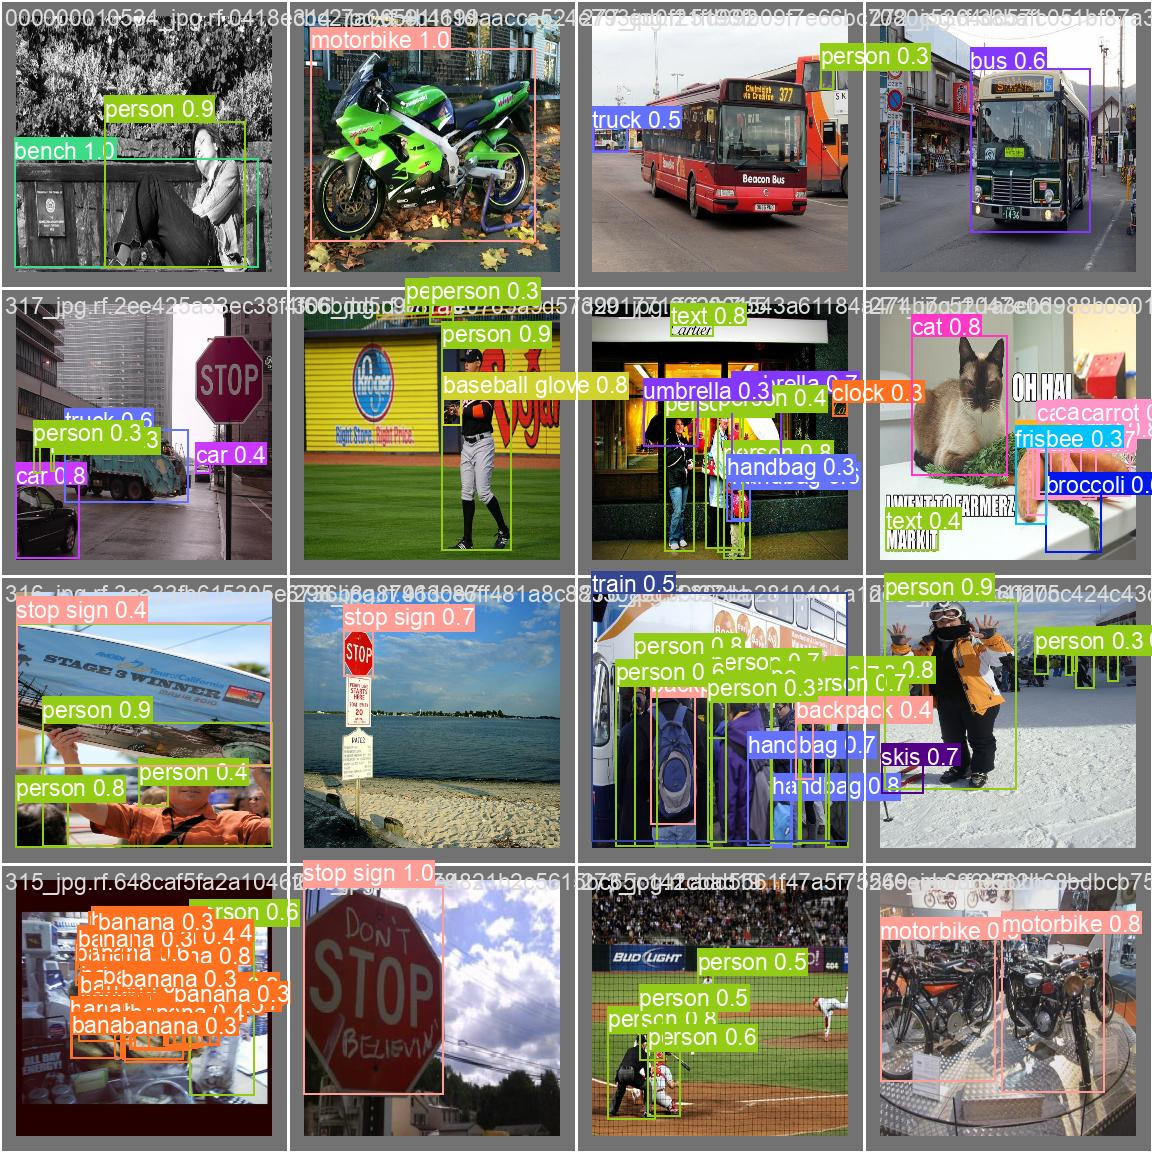

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/val_batch0_pred.jpg', width=1000)

In [46]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source={dataset.location}/train/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11156157 parameters, 0 gradients, 28.6 GFLOPs

image 1/564 /content/image_text-3/train/images/000000009465_jpg.rf.2e0f30bfe789a237c4b4de0398aafbfb.jpg: 256x256 1 horse, 8 persons, 1 train, 156.3ms
image 2/564 /content/image_text-3/train/images/000000009466_jpg.rf.1fa884d88b36547a96054d546522c51b.jpg: 256x256 1 cat, 108.8ms
image 3/564 /content/image_text-3/train/images/000000009469_jpg.rf.9bbb29743f376f667c1622f1bc5bcce5.jpg: 256x256 2 dogs, 1 person, 103.7ms
image 4/564 /content/image_text-3/train/images/000000009474_jpg.rf.bb11bf6944f82512329a584cfc653e4f.jpg: 256x256 1 bird, 114.7ms
image 5/564 /content/image_text-3/train/images/000000009478_jpg.rf.95e0c1635851718f234121285498c7dc.jpg: 256x256 1 giraffe, 111.9ms
image 6/564 /content/image_text-3/train/images/000000009488_jpg.rf.bc33a4dd61b8d2eeceab1ce938229c32.jpg: 256x256 3 backpacks, 1 bench, 6 chairs, 1

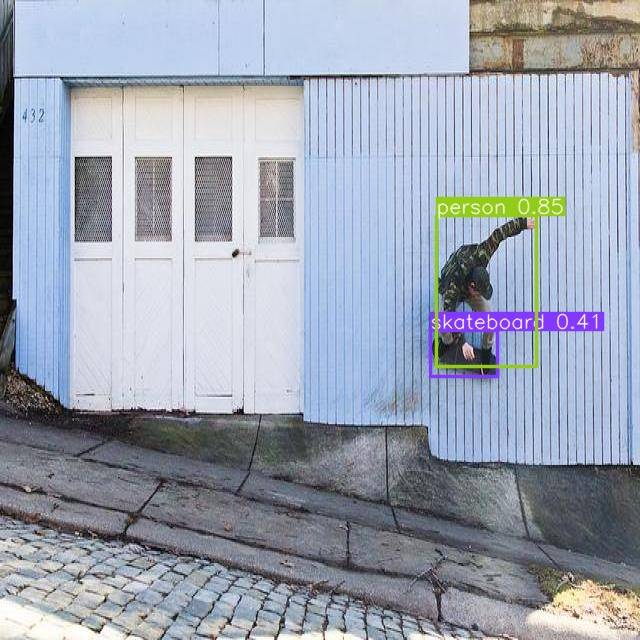

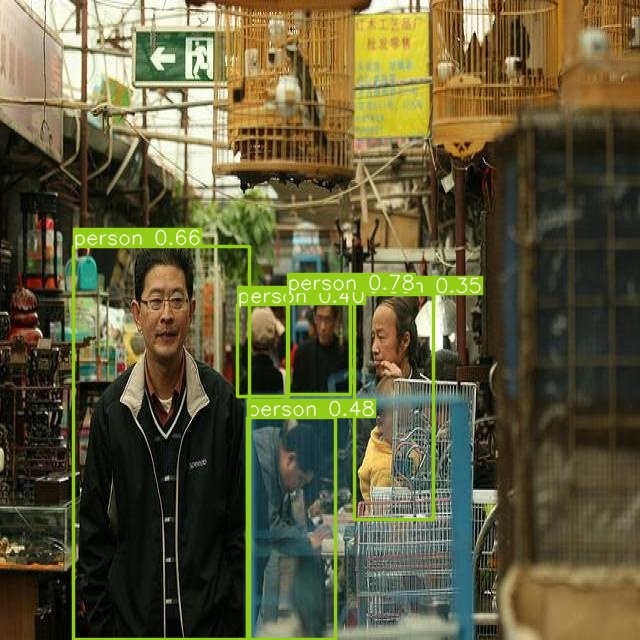

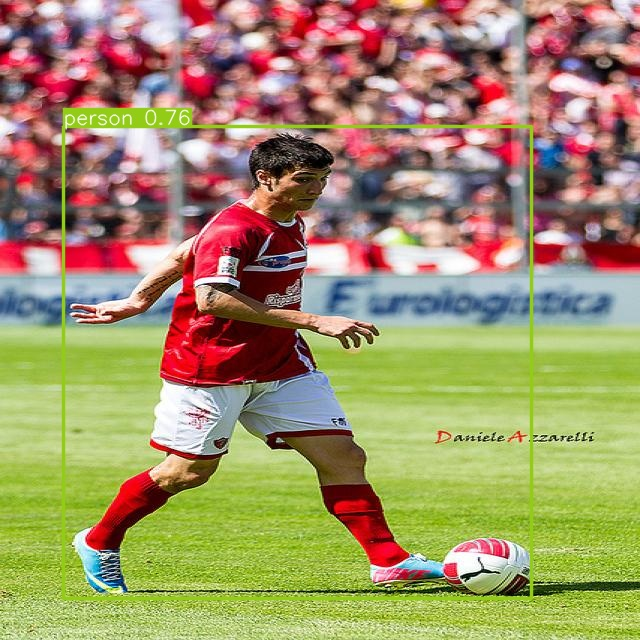

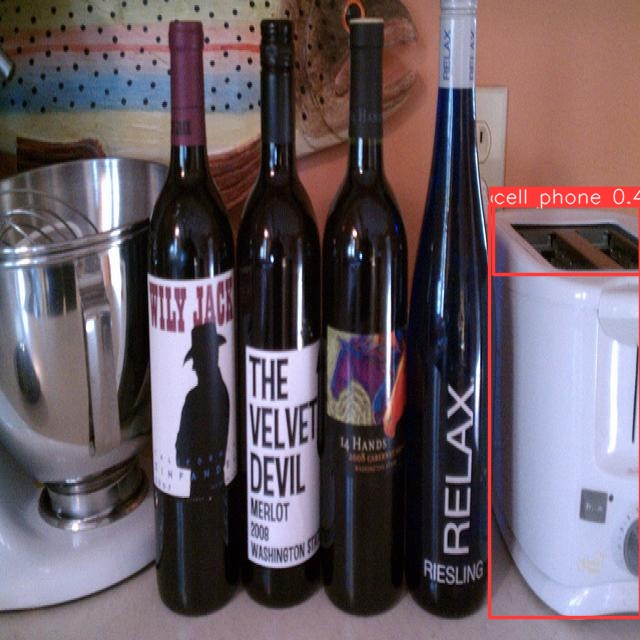

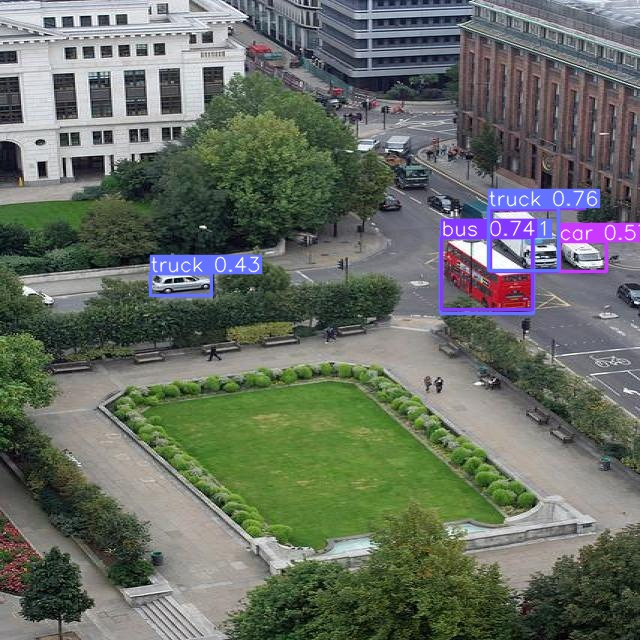

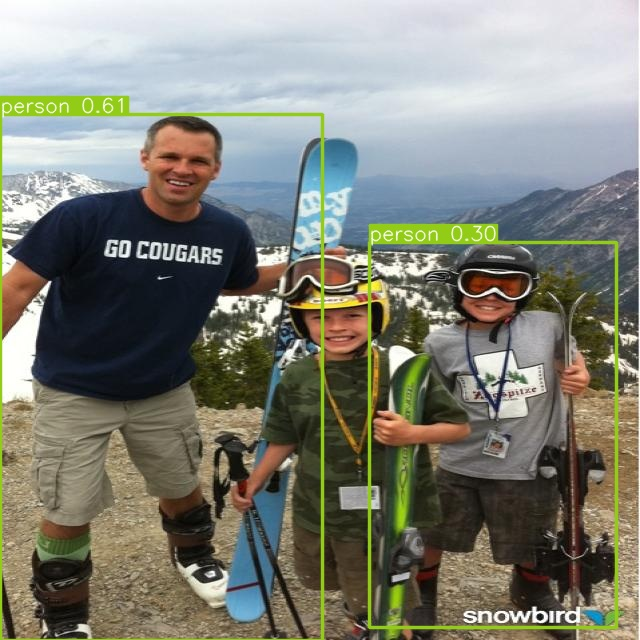

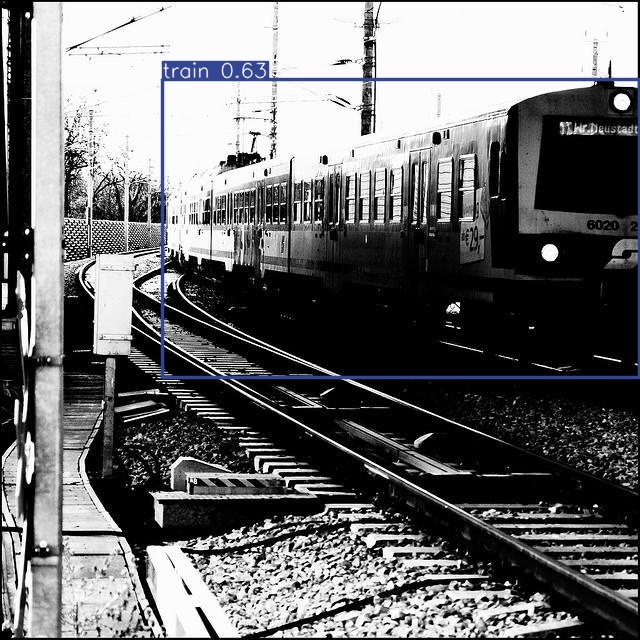

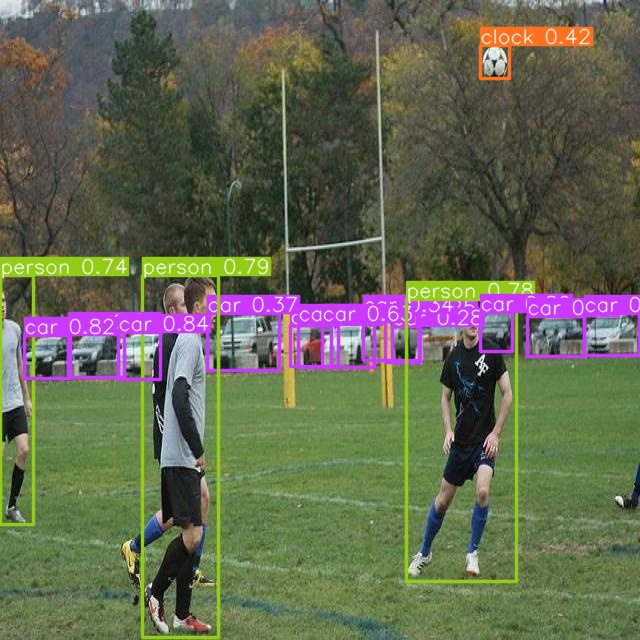

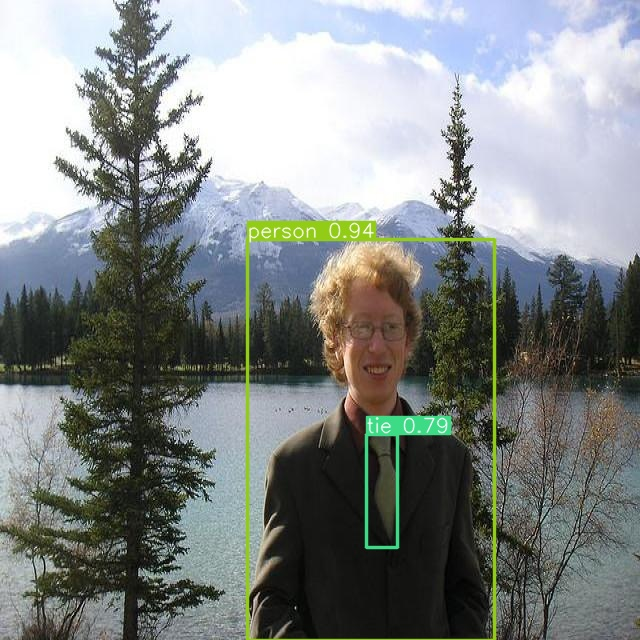

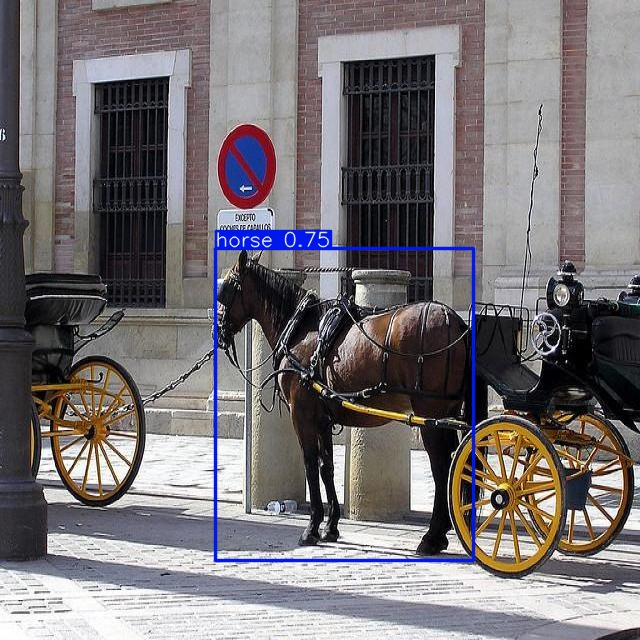

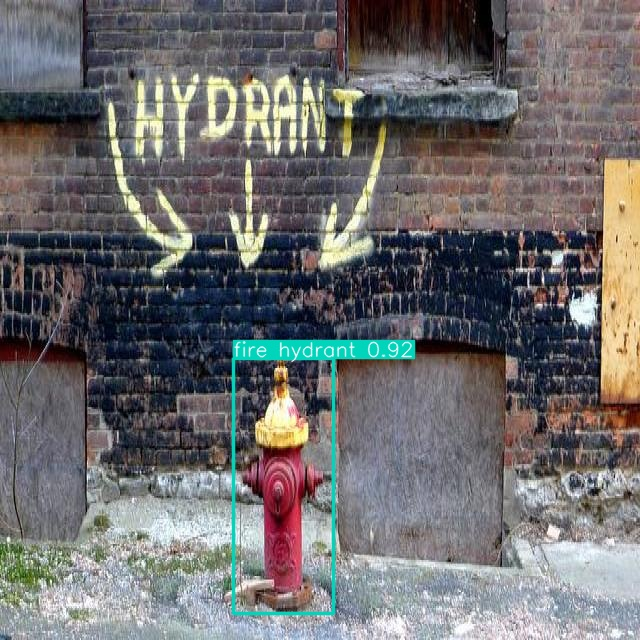

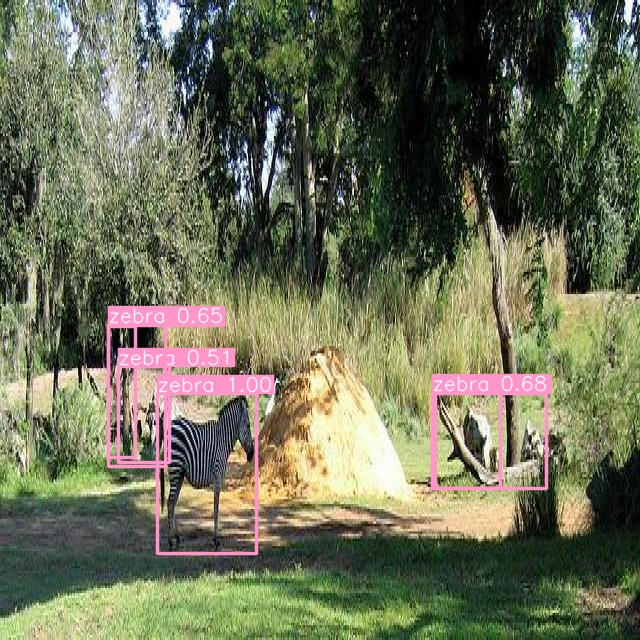

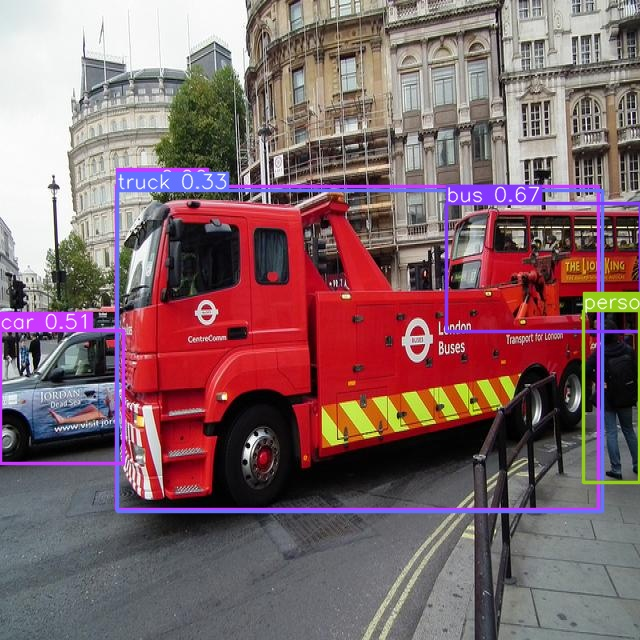

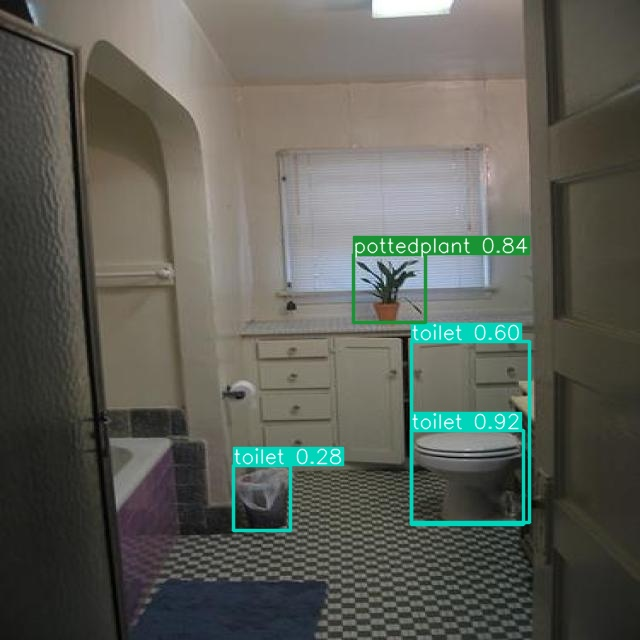

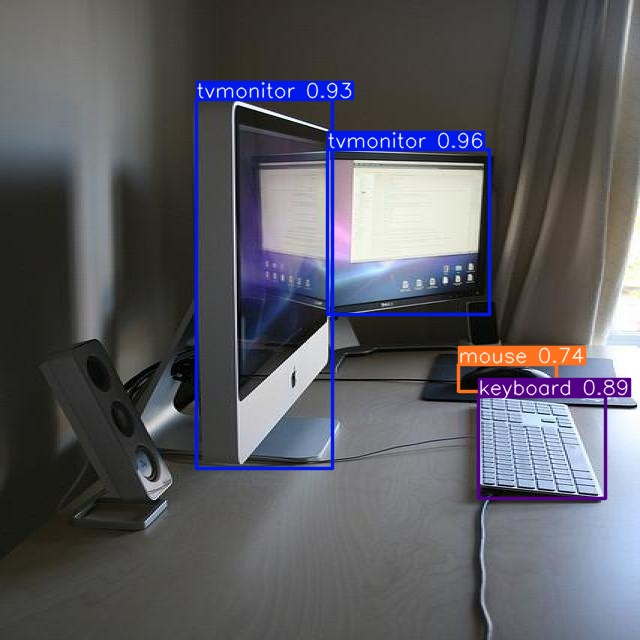

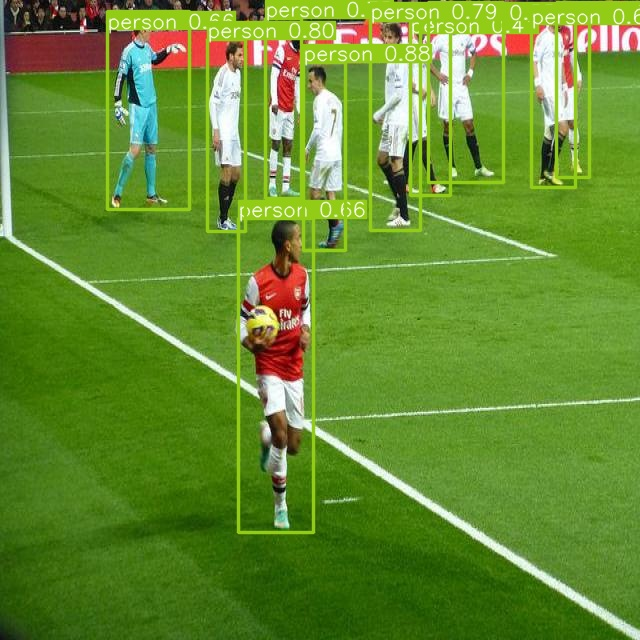

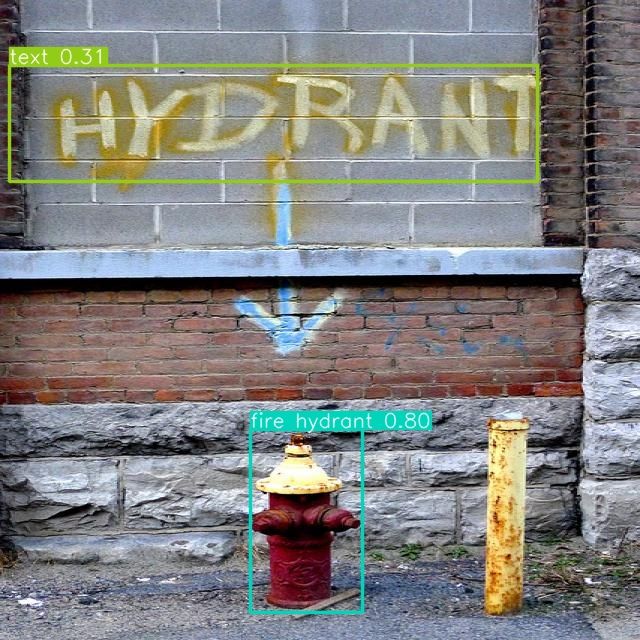

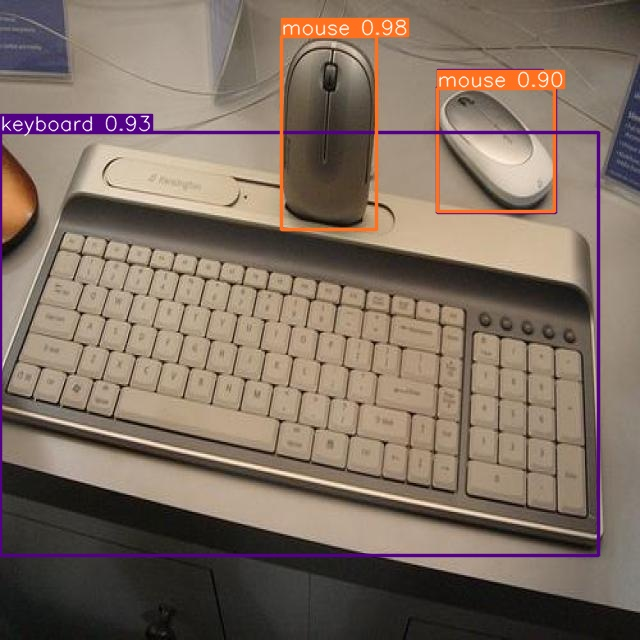

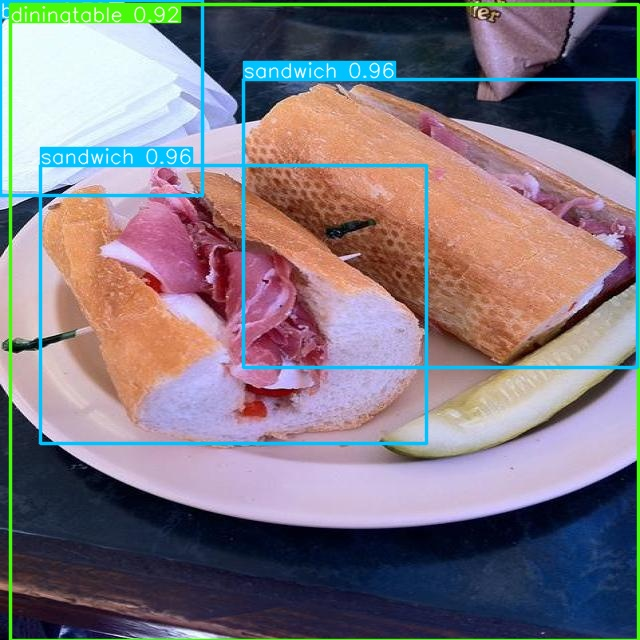

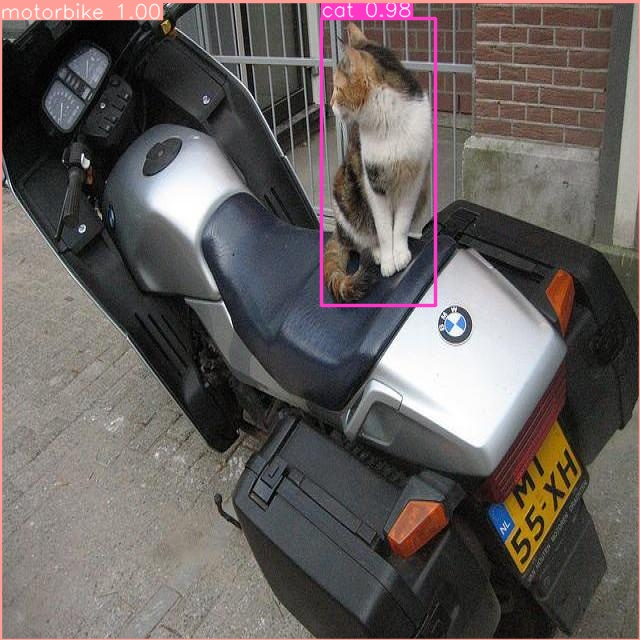

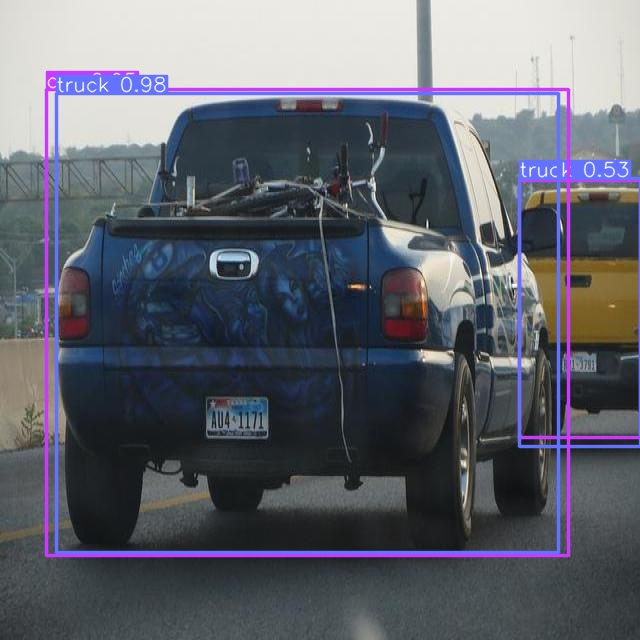

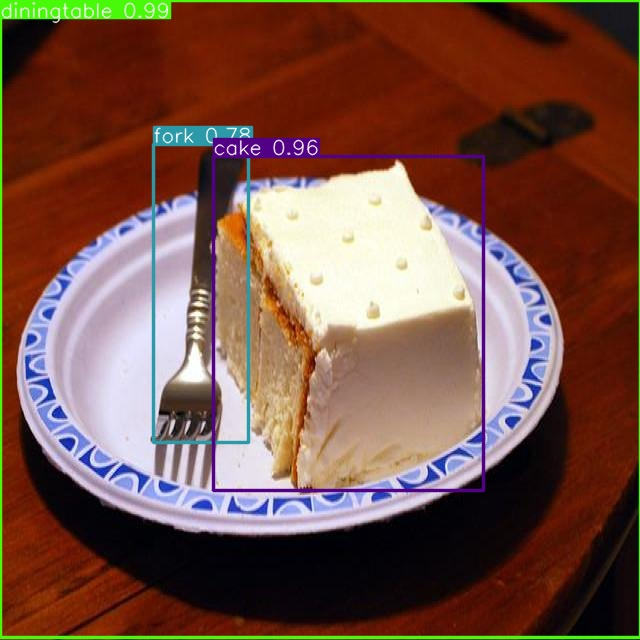

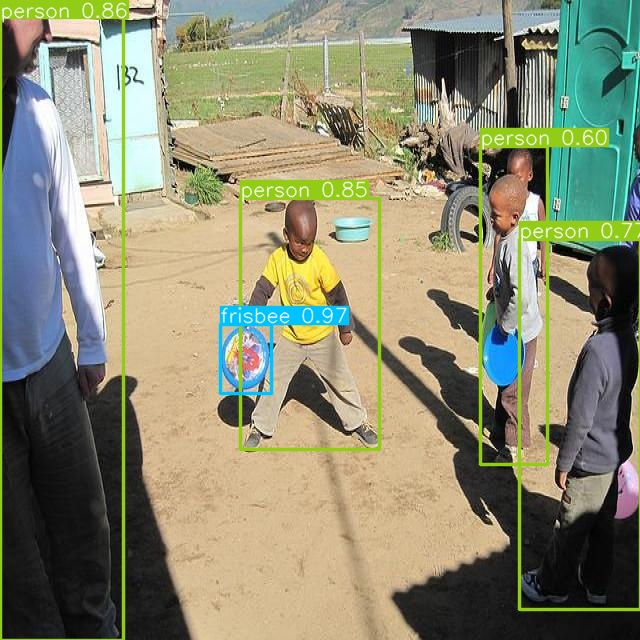

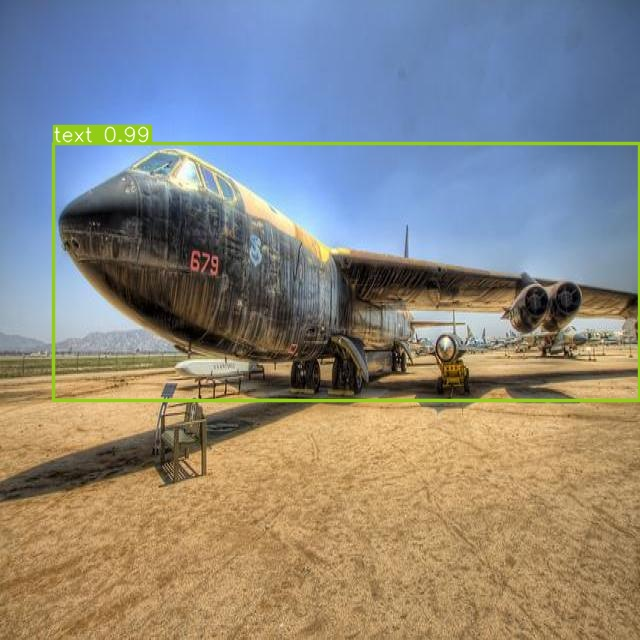

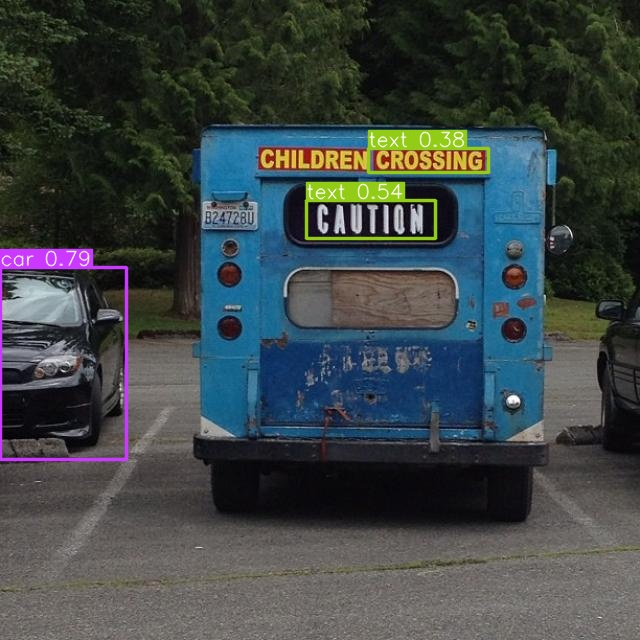

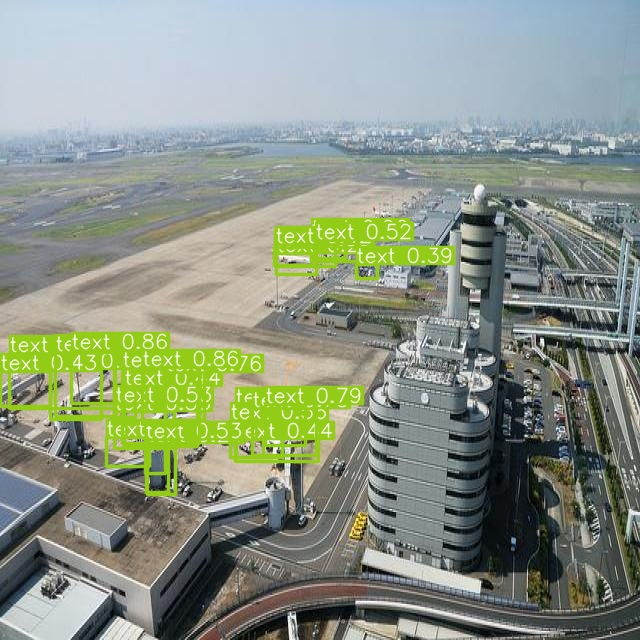

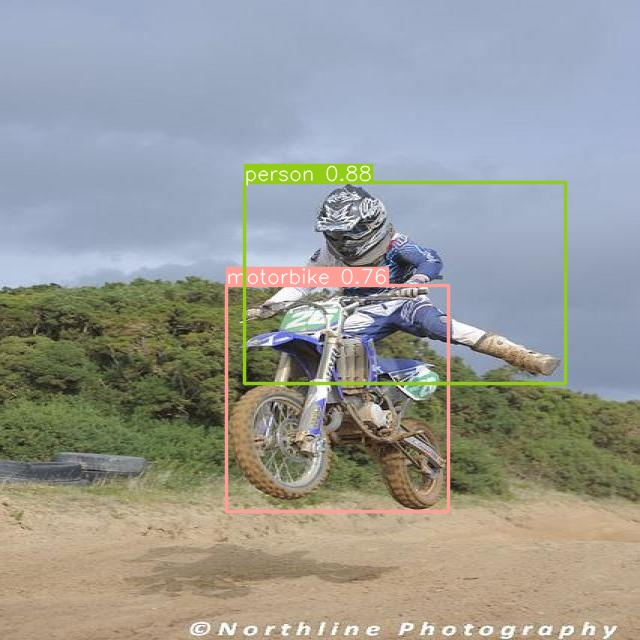

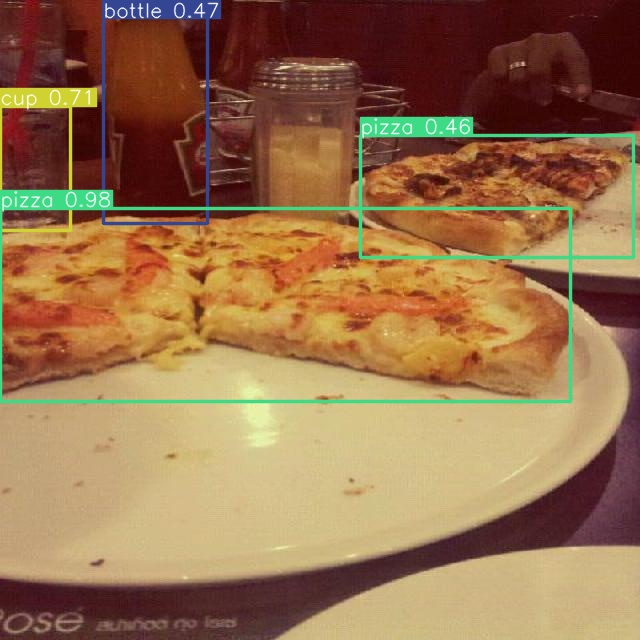

In [47]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[222:250]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [25]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

# **Tesseract OCR**

In [22]:
!pip install pytesseract

In [23]:
!pip install tesseract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562552 sha256=dc30aae0214a06aeaafdae07ec7d3851f484f06ac7b84a5e05589c5fde487385
  Stored in directory: /root/.cache/pip/wheels/71/c9/aa/698c579693e83fdda9ad6d6f0d8f61ed986e27925ef576f109
Successfully built tesseract


In [24]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,648 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [48]:
IMG_DIR = '/content/runs/detect/predict3/216_jpg.rf.a84aa46176d5132329fd46f6f836b965.jpg'

In [49]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

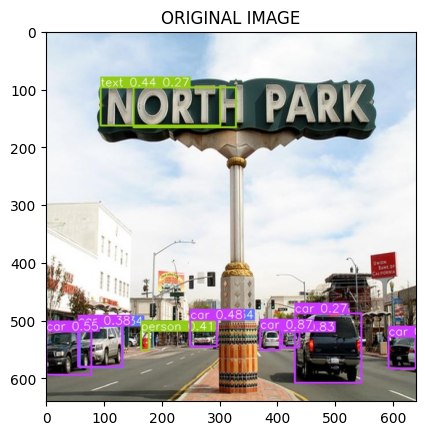

In [51]:
# Plot original image

image = cv2.imread('/content/runs/detect/predict3/216_jpg.rf.a84aa46176d5132329fd46f6f836b965.jpg')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('ORIGINAL IMAGE')
plt.show()

In [52]:
# Preprocess image

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
images = {'gray': gray,
          'thresh': thresh,
          'opening': opening,
          'canny': canny}

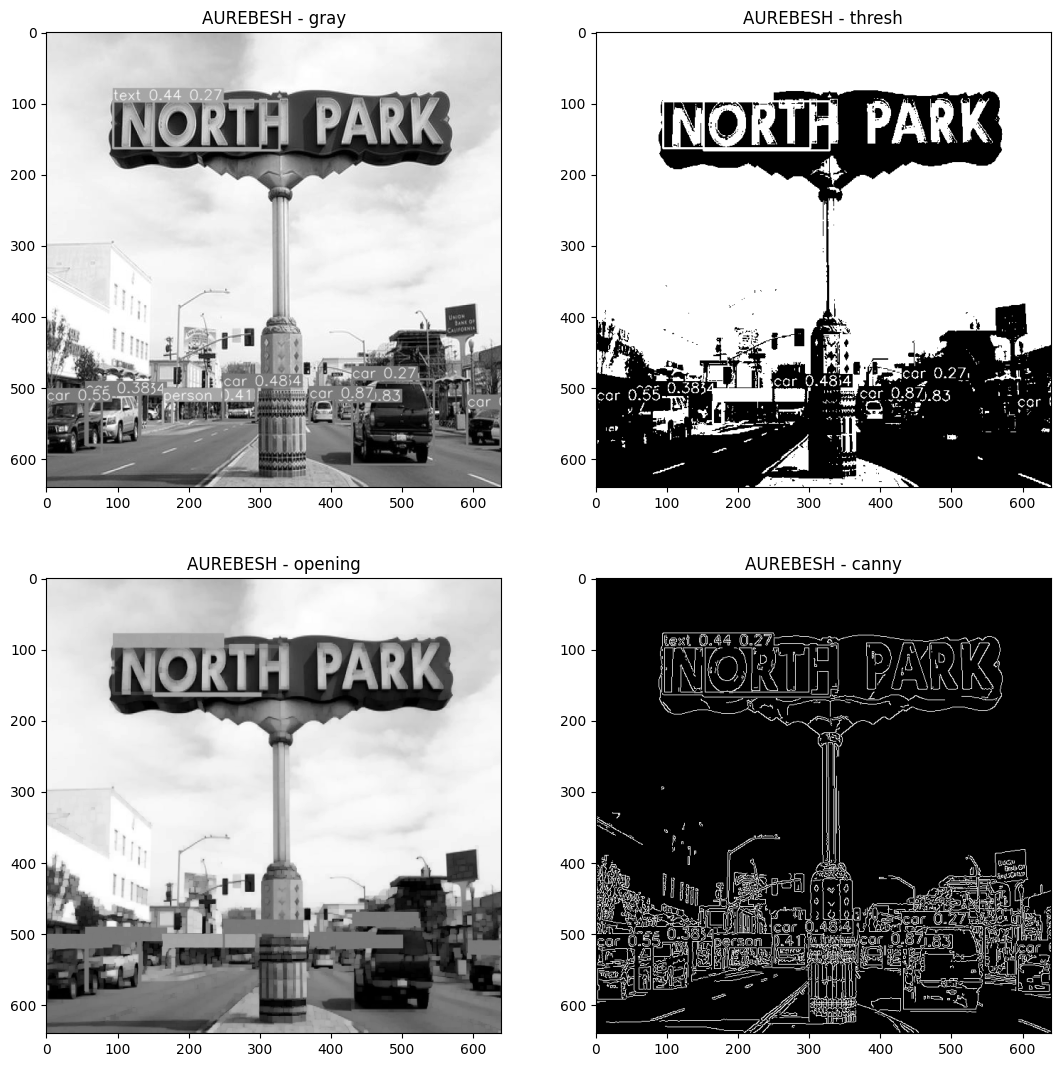

In [53]:
# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('AUREBESH - ' + keys[i])
    plt.imshow(images[keys[i]], cmap='gray')

In [60]:
from PIL import Image

# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'

# Assuming `image` is your image object
image = Image.open('/content/runs/detect/predict3/216_jpg.rf.a84aa46176d5132329fd46f6f836b965.jpg')  # Replace 'your_image_path.jpg' with the path to your image
ocr_output = pytesseract.image_to_string(image, config=custom_config)

# Print the OCR output
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(ocr_output)
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
INORTH PARK
<2
Win = I ee
bait 2 Bee rt = &


-----------------------------------------
TESSERACT OUTPUT --> THRESHOLDED IMAGE
-----------------------------------------
INORTH PARK
<2
Win = I ee
bait 2 Bee rt = &


-----------------------------------------
TESSERACT OUTPUT --> OPENED IMAGE
-----------------------------------------
INORTH PARK
<2
Win = I ee
bait 2 Bee rt = &


-----------------------------------------
TESSERACT OUTPUT --> CANNY EDGE IMAGE
-----------------------------------------
INORTH PARK
<2
Win = I ee
bait 2 Bee rt = &



# **TTS**

In [33]:
pip install gtts

In [36]:
pip install pydub

In [37]:
from pydub import AudioSegment
from pydub.playback import play
import hyphenate
from gtts import gTTS

In [38]:
!pip install playsound


  Preparing metadata (setup.py) ... done
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7020 sha256=6c0908767519a862398dcceeff2f0175dff2db945100f97b1afadd4039209900
  Stored in directory: /root/.cache/pip/wheels/90/89/ed/2d643f4226fc8c7c9156fc28abd8051e2d2c0de37ae51ac45c
Successfully built playsound


In [62]:
# Define the function to print whatever was read from the document
def print_ocr_text(ocr_output, output_dir):
    full_text = ocr_output
    print("Text read from the document:")
    print(full_text)
    # Remove punctuation and numbers
    clean_text = re.sub(r'[^\w\s]', '', full_text)  # Remove punctuation
    clean_text = re.sub(r'\d', '', clean_text)      # Remove numbers
    print("Cleaned text:")
    print(clean_text)

    # Speak the text
    speak_text(clean_text, output_dir)  # Pass cleaned text to speak_text function

# Example usage:
output_dir = "/content/"  # Define the output directory
output = "This image shows" + ocr_output  # Define the text to speak
print_ocr_text(output, output_dir)  # Call the function with the output text


Text read from the document:
This image showsINORTH PARK
<2
Win = I ee
bait 2 Bee rt = &

Cleaned text:
This image showsINORTH PARK

Win  I ee
bait  Bee rt  

